In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_econ = pd.read_csv('../data/Healthy_Economy_in_San_Mateo_County.csv')
df_hoods = pd.read_csv('../data/Healthy_Neighborhoods_in_San_Mateo_County.csv')

Data published September 29, 2016
Downloaded from San Mateo County Open Data:
https://datahub.smcgov.org/Health-Human-Services/Healthy-Economy-in-San-Mateo-County/4zd5-39i2 <br>
and <br>
https://datahub.smcgov.org/Health-Human-Services/Healthy-Neighborhoods-in-San-Mateo-County/3dqj-zf58

unemployment is unemployment rate

100 FPL is percentage of people below Federal poverty level<br>
200 FPL is percentage of people below 2x the Federal poverty level<br>
Active Transporation = Percent of residents who take active transportation to work <br>
DVMT = Daily Vehicle Miles traveled<br>
Food stamps = Percent of households enrolled in food stamps<br>


In [3]:
df_econ.head()

,City/County,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL
0,San Mateo County,93814,47198,0.48,7,8,20
1,Atherton,250000,144197,0.55,7,4,7
2,Belmont,103370,56302,0.45,7,6,13
3,Brisbane,82981,40401,0.41,10,4,19
4,Burlingame,90486,61062,0.51,5,6,16


In [4]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City/County              21 non-null     object 
 1   Median Household Income  21 non-null     int64  
 2   Per Capita Income        21 non-null     int64  
 3   Gini Index               21 non-null     float64
 4   Unemployment             21 non-null     int64  
 5   100% FPL                 21 non-null     int64  
 6   200% FPL                 21 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ KB


In [5]:
df_hoods.head()

,City/County,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People"
0,Colma,24,30,54,18,6,0,65.0
1,San Mateo County,13,26,64,25,3,28,21.0
2,Atherton,7,21,142,68,1,3,43.0
3,Belmont,7,10,117,117,1,5,14.0
4,Brisbane,16,30,68,23,3,1,25.0


In [6]:
df_hoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   City/County                                        21 non-null     object 
 1   Active Transportation                              21 non-null     int64  
 2   DVMT Per Capita                                    21 non-null     int64  
 3   Bike and Pedestrian Collisions Per 100,000 People  21 non-null     int64  
 4   Bike and Pedestrian Colliisons Per 1 Million DVMT  21 non-null     int64  
 5   Food Stamps                                        21 non-null     int64  
 6   Park Acres Per 1,000 People                        21 non-null     int64  
 7   Violent Crimes Per 100,000 People                  19 non-null     float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.4+ KB


In [7]:
df = pd.merge(df_econ, df_hoods, how='left')

In [8]:
df.set_index('City/County', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, San Mateo County to Woodside
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Median Household Income                            21 non-null     int64  
 1   Per Capita Income                                  21 non-null     int64  
 2   Gini Index                                         21 non-null     float64
 3   Unemployment                                       21 non-null     int64  
 4   100% FPL                                           21 non-null     int64  
 5   200% FPL                                           21 non-null     int64  
 6   Active Transportation                              21 non-null     int64  
 7   DVMT Per Capita                                    21 non-null     int64  
 8   Bike and Pedestrian Collisions Per 100,000 People  21 non-null     int64  
 

In [10]:
df.isna().sum()

Median Household Income                              0
Per Capita Income                                    0
Gini Index                                           0
Unemployment                                         0
100% FPL                                             0
200% FPL                                             0
Active Transportation                                0
DVMT Per Capita                                      0
Bike and Pedestrian Collisions Per 100,000 People    0
Bike and Pedestrian Colliisons Per 1 Million DVMT    0
Food Stamps                                          0
Park Acres Per 1,000 People                          0
Violent Crimes Per 100,000 People                    2
dtype: int64

In [11]:
df[df.isna().any(axis=1)]

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People"
City/County,,,,,,,,,,,,,
Portola Valley,181607,152128,0.58,7,3,7,4,17,45,26,0,162,NaN
Woodside,203833,125559,0.56,3,4,7,6,17,221,133,0,15,NaN


In [12]:
df[df['Violent Crimes Per 100,000 People']==0]

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People"
City/County,,,,,,,,,,,,,
Half Moon Bay,105972,54270,0.47,8,4,14,4,3,59,173,3,18,0.0
Millbrae,81352,43518,0.43,7,6,13,13,6,50,79,1,3,0.0
San Carlos,118068,62548,0.44,8,4,12,7,10,48,46,1,6,0.0


There are cities with violent crime at 0 already. We'll assume that the two NaNs come from nothing to report and make them 0.

In [13]:
df=df.fillna(0)
df.isna().sum()

Median Household Income                              0
Per Capita Income                                    0
Gini Index                                           0
Unemployment                                         0
100% FPL                                             0
200% FPL                                             0
Active Transportation                                0
DVMT Per Capita                                      0
Bike and Pedestrian Collisions Per 100,000 People    0
Bike and Pedestrian Colliisons Per 1 Million DVMT    0
Food Stamps                                          0
Park Acres Per 1,000 People                          0
Violent Crimes Per 100,000 People                    0
dtype: int64

In [14]:
#Need to remove "san mateo county" to compare just the cities in the county
df.drop('San Mateo County', inplace = True)

In [15]:
df.head()

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People"
City/County,,,,,,,,,,,,,
Atherton,250000,144197,0.55,7,4,7,7,21,142,68,1,3,43.0
Belmont,103370,56302,0.45,7,6,13,7,10,117,117,1,5,14.0
Brisbane,82981,40401,0.41,10,4,19,16,30,68,23,3,1,25.0
Burlingame,90486,61062,0.51,5,6,16,17,12,101,83,1,3,16.0
Colma,97969,30256,0.38,7,10,20,24,30,54,18,6,0,65.0


## Questions to ask

How do income and poverty stats relate to crime? Are richer towns safer?<br>
How is income/poverty related to commuting? Do people in poorer towns need to drive further?
Is the Gini index useful for anything. Is the Gini index correlated to anything?

In [16]:
df.describe()

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People"
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,117194.300000,63618.750000,0.458000,7.300000,6.350000,16.600000,11.150000,11.450000,73.450000,77.950000,2.650000,20.250000,18.35000
std,57778.802874,40199.622184,0.058002,1.809333,3.281126,10.137995,5.815361,7.776314,53.669039,51.130869,2.942877,38.585346,17.52074
min,54342.000000,18527.000000,0.380000,3.000000,3.000000,5.000000,4.000000,3.000000,5.000000,6.000000,0.000000,0.000000,0.00000
25%,82499.500000,39267.250000,0.410000,7.000000,4.000000,11.250000,7.000000,6.750000,40.500000,38.750000,1.000000,2.750000,0.75000
50%,96536.500000,50526.000000,0.445000,7.000000,6.000000,14.000000,9.500000,8.500000,54.500000,70.000000,2.000000,5.500000,17.50000
75%,119880.750000,64361.500000,0.500000,8.000000,7.000000,20.000000,14.250000,13.250000,99.500000,120.000000,3.250000,15.750000,24.25000
max,250000.000000,152128.000000,0.580000,12.000000,17.000000,51.000000,24.000000,30.000000,221.000000,173.000000,13.000000,162.000000,65.00000


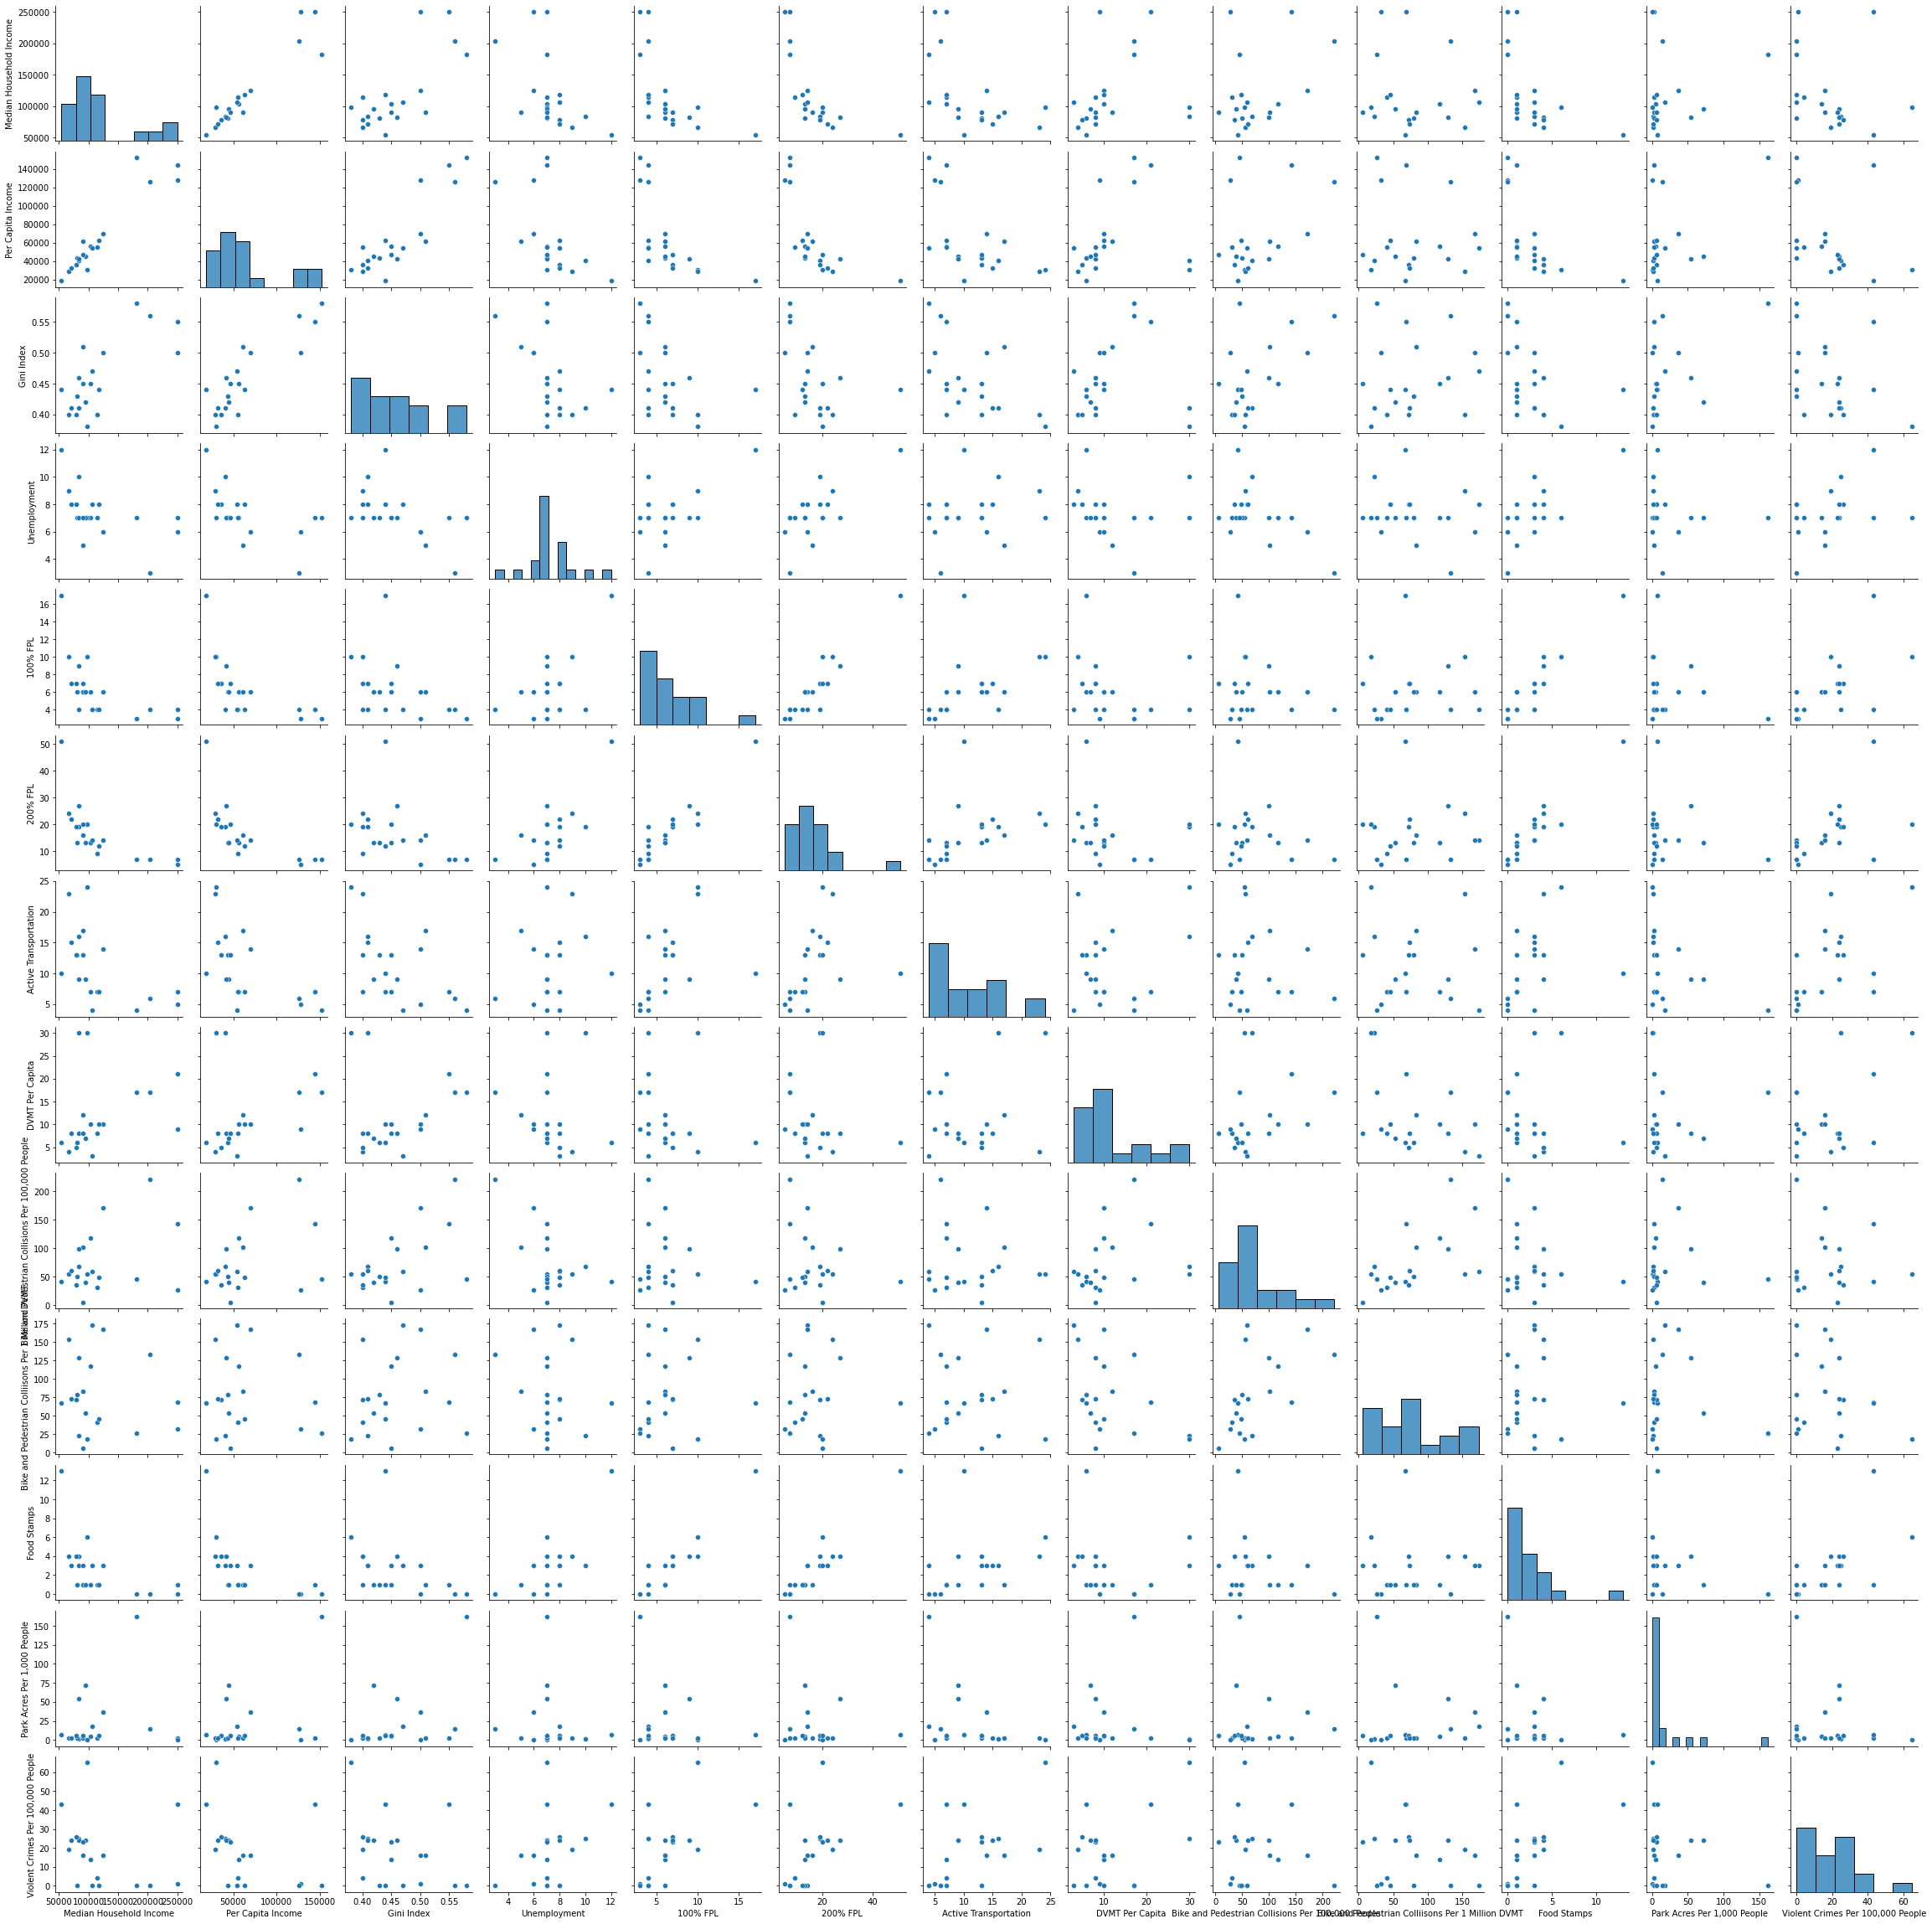

In [17]:
sns.pairplot(df)

<AxesSubplot:>

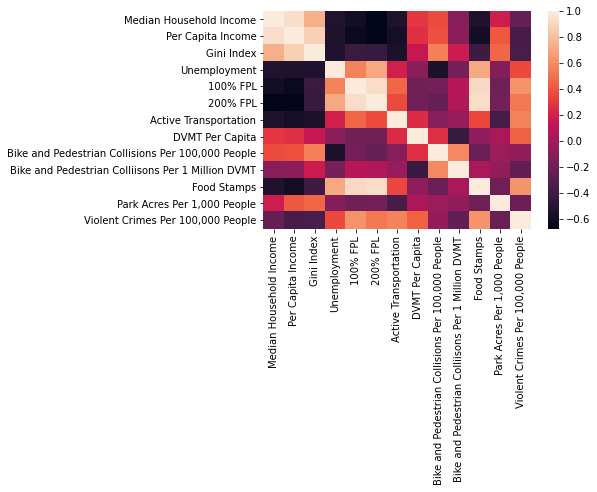

In [18]:
sns.heatmap(df.corr())

## Highly correlated values:
Median income and per capita income<br>
Food stamps and poverty values<br>
poverty 100 and poverty 200<br>

<AxesSubplot:xlabel='Gini Index', ylabel='Violent Crimes Per 100,000 People'>

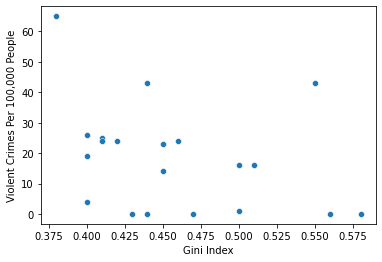

In [19]:
sns.scatterplot(x = df['Gini Index'], y = df['Violent Crimes Per 100,000 People'])

Crime and Gini index don't appear correlated.

<AxesSubplot:xlabel='Median Household Income', ylabel='Violent Crimes Per 100,000 People'>

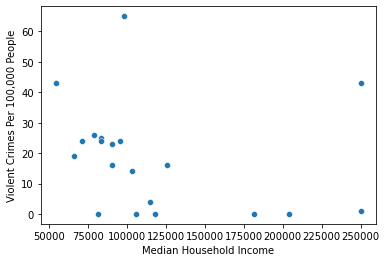

In [20]:
sns.scatterplot(x = df['Median Household Income'], y = df['Violent Crimes Per 100,000 People'])

<AxesSubplot:xlabel='Per Capita Income', ylabel='DVMT Per Capita'>

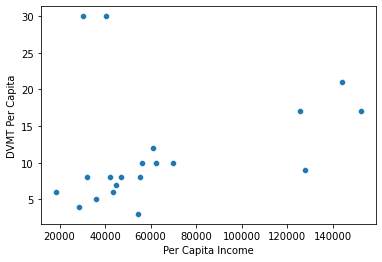

In [21]:
sns.scatterplot(x = df['Per Capita Income'], y = df['DVMT Per Capita'])

In [22]:
df.head(2)

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People"
City/County,,,,,,,,,,,,,
Atherton,250000,144197,0.55,7,4,7,7,21,142,68,1,3,43.0
Belmont,103370,56302,0.45,7,6,13,7,10,117,117,1,5,14.0


In [23]:
X = df.drop(['Violent Crimes Per 100,000 People'], axis = 1)
y = df['Violent Crimes Per 100,000 People']
X = sm.add_constant(X)
crime1 = sm.OLS(y, X)
crime1_result = crime1.fit()
crime1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Violent Crimes Per 100,000 People   R-squared:                       0.811
Model:                                           OLS   Adj. R-squared:                  0.488
Method:                                Least Squares   F-statistic:                     2.509
Date:                               Sat, 28 Aug 2021   Prob (F-statistic):              0.114
Time:                                       08:46:33   Log-Likelihood:                -68.453
No. Observations:                                 20   AIC:                             162.9
Df Residuals:                                      7   BIC:                             175.9
Df Model:                                         12                                         
Covariance Type:                           nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              -100.2919    109.503     -0.916      0.390    -359.224     158.640
Median Household Income                               0.0004      0.000      1.375      0.212      -0.000       0.001
Per Capita Income                                    -0.0009      0.001     -1.259      0.248      -0.003       0.001
Gini Index                                          168.9749    245.455      0.688      0.513    -411.434     749.383
Unemployment                                          3.4220      4.403      0.777      0.462      -6.989      13.833
100% FPL                                              4.0391      4.076      0.991      0.355      -5.600      13.678
200% FPL                                             -1.2618      1.751     -0.721      0.495      -5.402       2.879
Active Transportation                                 0.8669      1.004      0.863      0.417      -1.507       3.241
DVMT Per Capita                                       0.5001      0.961      0.520      0.619      -1.772       2.772
Bike and Pedestrian Collisions Per 100,000 People     0.1038      0.164      0.634      0.546      -0.283       0.491
Bike and Pedestrian Colliisons Per 1 Million DVMT    -0.1340      0.151     -0.888      0.404      -0.491       0.223
Food Stamps                                           1.1647      4.270      0.273      0.793      -8.932      11.262
Park Acres Per 1,000 People                           0.1331      0.142      0.935      0.381      -0.203       0.470
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.964
Skew:                           0.492   Prob(JB):                        0.618
Kurtosis:                       2.565   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

May be collinearity. Removing some of the columns to fix that

In [24]:
X = df.drop(['Violent Crimes Per 100,000 People', 'Median Household Income', '100% FPL', 'Food Stamps', 'Bike and Pedestrian Colliisons Per 1 Million DVMT'], axis = 1)
y = df['Violent Crimes Per 100,000 People']
X = sm.add_constant(X)
crime2 = sm.OLS(y, X)
crime2_result = crime1.fit()
crime2_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Violent Crimes Per 100,000 People   R-squared:                       0.811
Model:                                           OLS   Adj. R-squared:                  0.488
Method:                                Least Squares   F-statistic:                     2.509
Date:                               Sat, 28 Aug 2021   Prob (F-statistic):              0.114
Time:                                       08:46:34   Log-Likelihood:                -68.453
No. Observations:                                 20   AIC:                             162.9
Df Residuals:                                      7   BIC:                             175.9
Df Model:                                         12                                         
Covariance Type:                           nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              -100.2919    109.503     -0.916      0.390    -359.224     158.640
Median Household Income                               0.0004      0.000      1.375      0.212      -0.000       0.001
Per Capita Income                                    -0.0009      0.001     -1.259      0.248      -0.003       0.001
Gini Index                                          168.9749    245.455      0.688      0.513    -411.434     749.383
Unemployment                                          3.4220      4.403      0.777      0.462      -6.989      13.833
100% FPL                                              4.0391      4.076      0.991      0.355      -5.600      13.678
200% FPL                                             -1.2618      1.751     -0.721      0.495      -5.402       2.879
Active Transportation                                 0.8669      1.004      0.863      0.417      -1.507       3.241
DVMT Per Capita                                       0.5001      0.961      0.520      0.619      -1.772       2.772
Bike and Pedestrian Collisions Per 100,000 People     0.1038      0.164      0.634      0.546      -0.283       0.491
Bike and Pedestrian Colliisons Per 1 Million DVMT    -0.1340      0.151     -0.888      0.404      -0.491       0.223
Food Stamps                                           1.1647      4.270      0.273      0.793      -8.932      11.262
Park Acres Per 1,000 People                           0.1331      0.142      0.935      0.381      -0.203       0.470
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.964
Skew:                           0.492   Prob(JB):                        0.618
Kurtosis:                       2.565   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

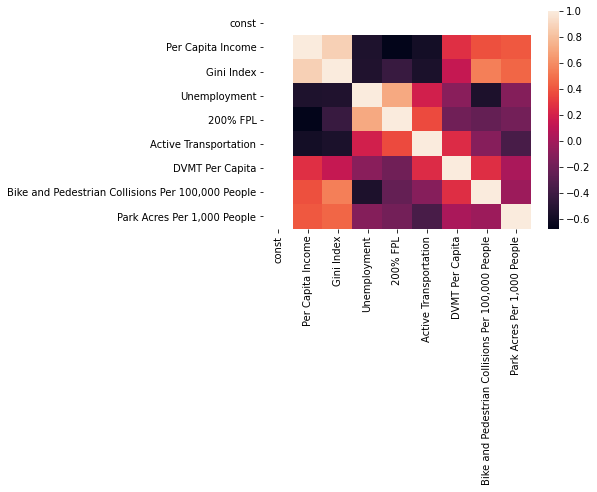

In [25]:
sns.heatmap(X.corr())

<AxesSubplot:xlabel='100% FPL', ylabel='Food Stamps'>

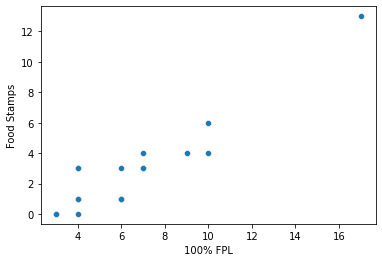

In [26]:
sns.scatterplot(x = '100% FPL', y = 'Food Stamps', data = df)

<AxesSubplot:xlabel='City/County', ylabel='Per Capita Income'>

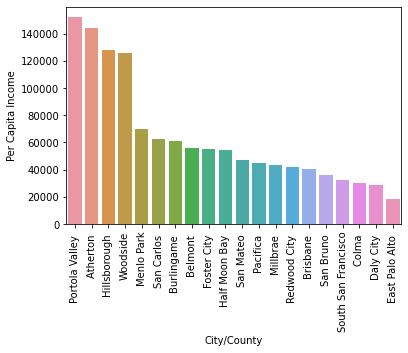

In [27]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Per Capita Income', data = df, order = df['Per Capita Income'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='City/County', ylabel='Violent Crimes Per 100,000 People'>

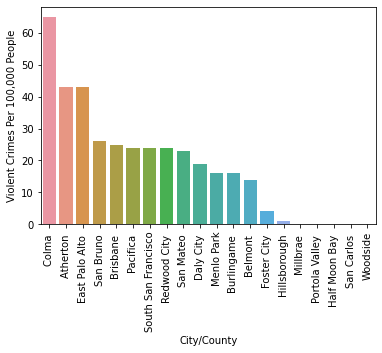

In [55]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Violent Crimes Per 100,000 People', data = df, order = df['Violent Crimes Per 100,000 People'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='City/County', ylabel='Median Household Income'>

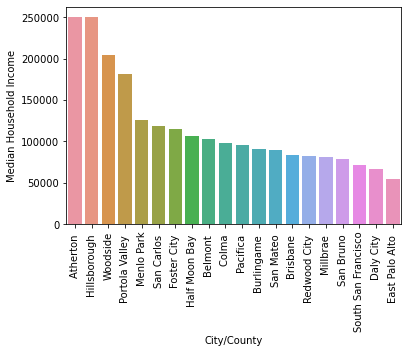

In [29]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Median Household Income', data = df, order = df['Median Household Income'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='City/County', ylabel='Gini Index'>

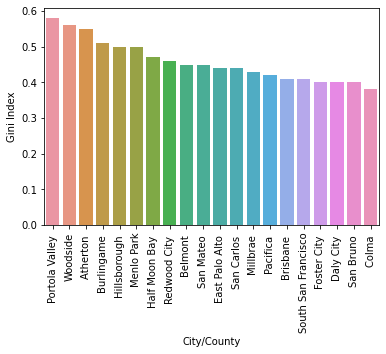

In [30]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Gini Index', data = df, order = df['Gini Index'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='City/County', ylabel='200% FPL'>

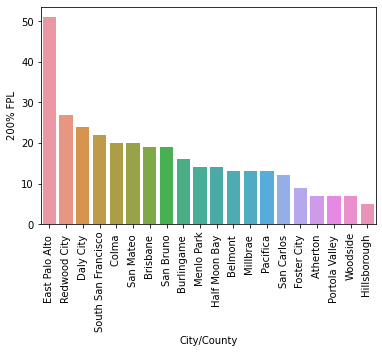

In [61]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = '200% FPL', data = df, order = df['200% FPL'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='City/County', ylabel='200% FPL'>

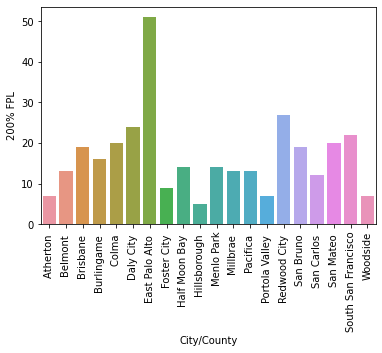

In [62]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = '200% FPL', data = df)

<AxesSubplot:xlabel='City/County', ylabel='Violent Crimes Per 100,000 People'>

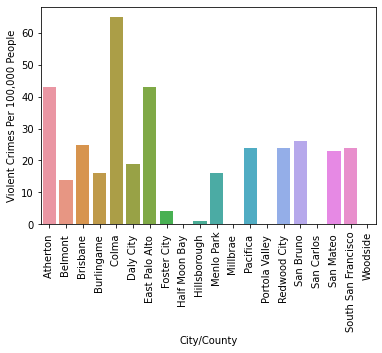

In [63]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Violent Crimes Per 100,000 People', data = df)

<AxesSubplot:xlabel='City/County', ylabel='Violent Crimes Per 100,000 People'>

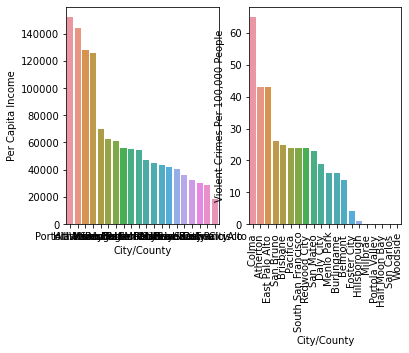

In [31]:
fig, ax1 = plt.subplots(1,2)
plt.xticks(rotation=90)
sns.barplot(ax = axes[0], x = df.index, y = 'Per Capita Income', data = df, order = df['Per Capita Income'].sort_values(ascending = False).index.values)
plt.xticks(rotation=90)
sns.barplot(ax = axes[1], x = df.index, y = 'Violent Crimes Per 100,000 People', data = df, order = df['Violent Crimes Per 100,000 People'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='Per Capita Income', ylabel='200% FPL'>

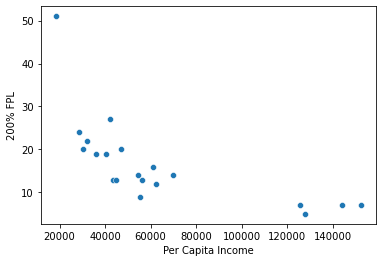

In [57]:
sns.scatterplot(x = 'Per Capita Income', y = '200% FPL', data = df)

<AxesSubplot:xlabel='200% FPL', ylabel='Violent Crimes Per 100,000 People'>

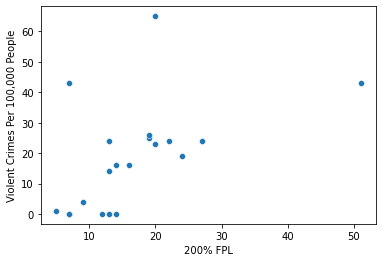

In [58]:
sns.scatterplot(x = '200% FPL', y = 'Violent Crimes Per 100,000 People', data = df)

<AxesSubplot:xlabel='200% FPL', ylabel='Violent Crimes Per 100,000 People'>

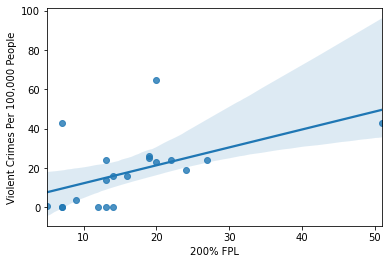

In [59]:
sns.regplot(x = '200% FPL', y = 'Violent Crimes Per 100,000 People', data = df)

<AxesSubplot:xlabel='Median Household Income', ylabel='Gini Index'>

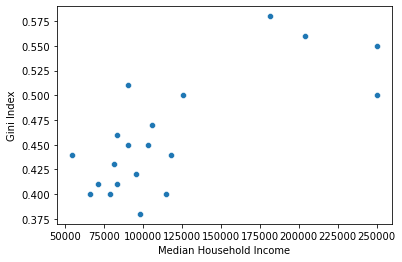

In [32]:
sns.scatterplot(x = 'Median Household Income', y = 'Gini Index', data = df)

<AxesSubplot:xlabel='Per Capita Income', ylabel='DVMT Per Capita'>

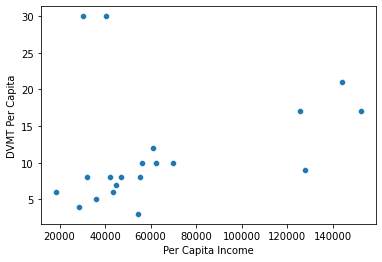

In [33]:
sns.scatterplot(x = 'Per Capita Income', y = 'DVMT Per Capita', data = df)

<AxesSubplot:xlabel='Per Capita Income', ylabel='DVMT Per Capita'>

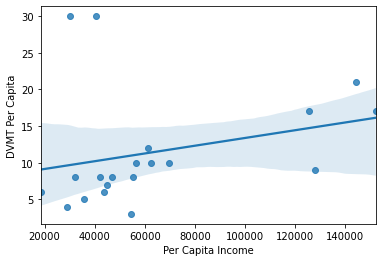

In [36]:
sns.regplot(x = 'Per Capita Income', y = 'DVMT Per Capita', data = df)


In [37]:
np.corrcoef(df['DVMT Per Capita'], df['Per Capita Income'])

array([[1.        , 0.27359042],
       [0.27359042, 1.        ]])

<AxesSubplot:xlabel='City/County', ylabel='DVMT Per Capita'>

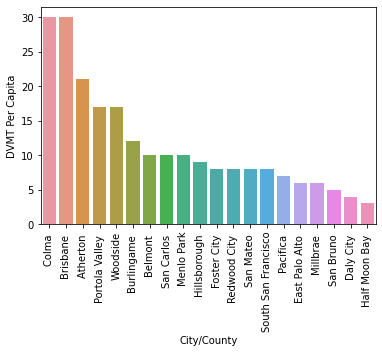

In [38]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'DVMT Per Capita', data = df, order = df['DVMT Per Capita'].sort_values(ascending = False).index.values)

<AxesSubplot:xlabel='City/County', ylabel='DVMT Per Capita'>

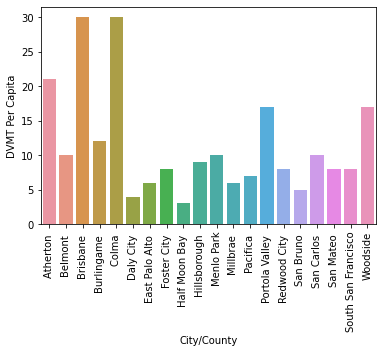

In [66]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'DVMT Per Capita', data = df)

<AxesSubplot:xlabel='200% FPL', ylabel='DVMT Per Capita'>

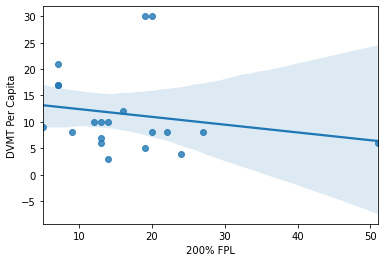

In [64]:
sns.regplot(x = '200% FPL', y = 'DVMT Per Capita', data = df)

### Interesting. Commute miles do not seem to be correlated to income

<AxesSubplot:xlabel='Unemployment', ylabel='DVMT Per Capita'>

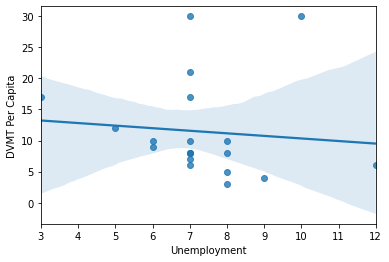

In [65]:
sns.regplot(x = 'Unemployment', y = 'DVMT Per Capita', data = df)

<AxesSubplot:xlabel='Unemployment', ylabel='Violent Crimes Per 100,000 People'>

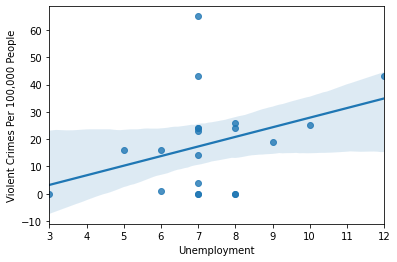

In [67]:
sns.regplot(x = 'Unemployment', y = 'Violent Crimes Per 100,000 People', data = df)

In [39]:
X = df.drop(['DVMT Per Capita', 'Median Household Income', '100% FPL', 'Food Stamps', 'Bike and Pedestrian Colliisons Per 1 Million DVMT'], axis = 1)
y = df['DVMT Per Capita']
X = sm.add_constant(X)
commute1 = sm.OLS(y, X)
commute1_result = commute1.fit()
commute1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DVMT Per Capita   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1.876
Date:                Sat, 28 Aug 2021   Prob (F-statistic):              0.165
Time:                        08:51:15   Log-Likelihood:                -60.282
No. Observations:                  20   AIC:                             138.6
Df Residuals:                      11   BIC:                             147.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.4012     37.459     -0.064      0.950     -84.849      80.046
Per Capita Income                                  9.879e-05      0.000      0.686      0.507      -0.000       0.000
Gini Index                                          -22.1718     95.226     -0.233      0.820    -231.762     187.419
Unemployment                                          1.5172      1.599      0.949      0.363      -2.002       5.037
200% FPL                                             -0.3747      0.396     -0.946      0.365      -1.247       0.497
Active Transportation                                 0.4422      0.393      1.125      0.284      -0.423       1.307
Bike and Pedestrian Collisions Per 100,000 People     0.0434      0.043      1.012      0.333      -0.051       0.138
Park Acres Per 1,000 People                           0.0180      0.049      0.370      0.718      -0.089       0.125
Violent Crimes Per 100,000 People                     0.2389      0.135      1.772      0.104      -0.058       0.536
==============================================================================
Omnibus:                        3.718   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.757
Skew:                           0.556   Prob(JB):                        0.415
Kurtosis:                       3.933   Cond. No.                     5.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Just for fun, lets see what clustering looks like for these data

Text(0, 0.5, 'Sum of Squares')

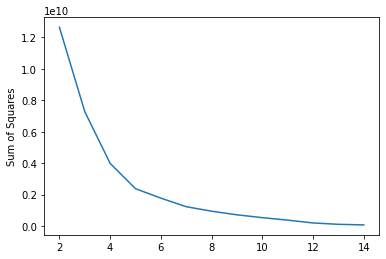

In [79]:
from sklearn.cluster import KMeans

ss = []
assignments = {}
X = df.to_numpy()
Krange = list(range(2, 15))

for K in Krange:
    model = KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster

plt.plot(Krange, ss)
 
plt.ylabel("Sum of Squares")
   
    


5


Text(0, 0.5, 'Count')

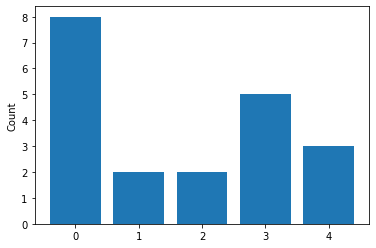

In [81]:
best_K = 5
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

plt.bar(range(best_K), counts, align='center')

#plt.xlabel("Cluster ID")
plt.ylabel("Count")

In [82]:
City_Cluster = pd.DataFrame(assignments_best_K, index = df.index, columns = ['Cluster_ID'])
City_Cluster.head()

,Cluster_ID
City/County,
Atherton,1
Belmont,3
Brisbane,0
Burlingame,0
Colma,0


In [92]:
City_Cluster.sort_values('Cluster_ID')

,Cluster_ID
City/County,
San Mateo,0
Brisbane,0
Burlingame,0
Colma,0
San Bruno,0
Redwood City,0
Pacifica,0
Millbrae,0
Atherton,1


In [96]:
df['Cluster_ID'] = City_Cluster['Cluster_ID']
df.head(2)

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People",Cluster_ID
City/County,,,,,,,,,,,,,,
Atherton,250000,144197,0.55,7,4,7,7,21,142,68,1,3,43.0,1
Belmont,103370,56302,0.45,7,6,13,7,10,117,117,1,5,14.0,3


In [97]:
df.sort_values('Cluster_ID')

,Median Household Income,Per Capita Income,Gini Index,Unemployment,100% FPL,200% FPL,Active Transportation,DVMT Per Capita,"Bike and Pedestrian Collisions Per 100,000 People",Bike and Pedestrian Colliisons Per 1 Million DVMT,Food Stamps,"Park Acres Per 1,000 People","Violent Crimes Per 100,000 People",Cluster_ID
City/County,,,,,,,,,,,,,,
San Mateo,90141,46782,0.45,7,7,20,13,8,5,6,3,6,23.0,0
Brisbane,82981,40401,0.41,10,4,19,16,30,68,23,3,1,25.0,0
Burlingame,90486,61062,0.51,5,6,16,17,12,101,83,1,3,16.0,0
Colma,97969,30256,0.38,7,10,20,24,30,54,18,6,0,65.0,0
San Bruno,78765,35866,0.40,8,7,19,13,5,36,72,4,6,26.0,0
Redwood City,82882,42063,0.46,7,9,27,9,8,99,129,4,54,24.0,0
Pacifica,95104,44886,0.42,7,6,13,9,7,39,53,1,72,24.0,0
Millbrae,81352,43518,0.43,7,6,13,13,6,50,79,1,3,0.0,0
Atherton,250000,144197,0.55,7,4,7,7,21,142,68,1,3,43.0,1


<AxesSubplot:xlabel='City/County', ylabel='Per Capita Income'>

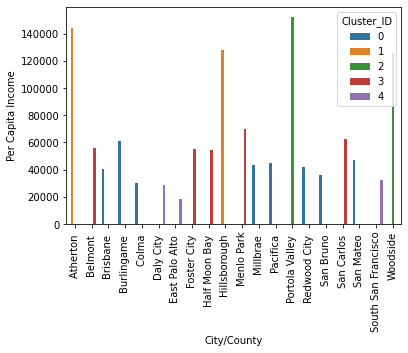

In [99]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Per Capita Income', hue = 'Cluster_ID', data = df)

<AxesSubplot:xlabel='City/County', ylabel='Violent Crimes Per 100,000 People'>

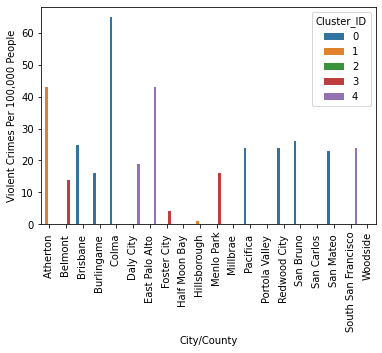

In [100]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'Violent Crimes Per 100,000 People', hue = 'Cluster_ID', data = df)

<AxesSubplot:xlabel='City/County', ylabel='DVMT Per Capita'>

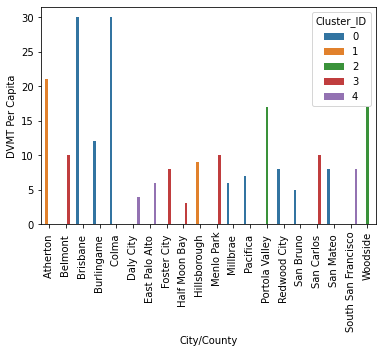

In [101]:
plt.xticks(rotation=90)
sns.barplot(x = df.index, y = 'DVMT Per Capita', hue = 'Cluster_ID', data = df)

Text(0, 0.5, 'Proportion of Variance Explained')

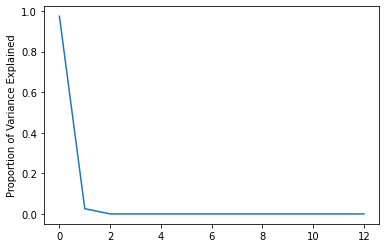

In [103]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

variance = pca.explained_variance_ratio_

plt.plot(range(len(variance)), variance)

# Label the axes
#plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")

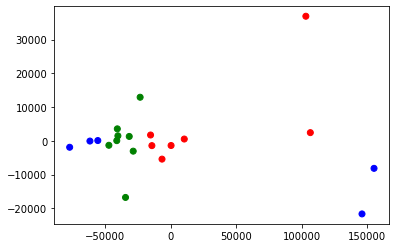

In [109]:
import matplotlib.colors

model = KMeans(n_clusters=5)
# Call a fit_predict() on X 
cluster_assignments = model.fit_predict(X)


pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)